# Notebook de Experimentos do Classificador KNN

## Imports

In [3]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data.loader import DataLoader
from src.data.preprocessor import DataPreprocessor, preprocess_dataset
from src.algorithms.knn_classifier import KNNClassifier, find_optimal_k

loader = DataLoader(data_root="../data/raw")
sns.set_style('whitegrid')

## Testes

### Teste Colon

In [4]:
X, y = loader.load_dataset('colon')[0:2]
X_train, X_test, y_train, y_test = preprocess_dataset(
    X, y,
    normalization='standard',
    test_size=0.3,
    random_state=42
)

knn = KNNClassifier(k=7, distance_metric='euclidean')
knn.fit(X_train, y_train)

train_acc = knn.score(X_train, y_train)
test_acc = knn.score(X_test, y_test)

print(f"\nAcurácia Treino: {train_acc:.4f}")
print(f"Acurácia Teste: {test_acc:.4f}")

Carregando conjunto de dados de microarray: COLON-TUMOR
Formato Elvira detectado
Parseando arquivo Elvira: colonTumor.dbc
Número de casos esperados: 62
Encontrados 2001 nós/variáveis
Nó de label: SampleType
Estados do label: ['positive', 'negative']
Extraídos 62 casos
Mapeamento de labels: {'positive': 0, 'negative': 1}
Matriz de dados: X=(62, 2000), y=(62,)
Classes únicas em y: [0 1] (distribuição: [22 40])
Conjunto de dados COLON-TUMOR carregado com sucesso. X_train: (43, 2000), X_test: (19, 2000)
Features: 2000, Samples: 62, Classes: 2
Dados normalizados com standard
Shape: (43, 2000), Min: -1.9836, Max: 6.2386
Divisão treino/teste: 70/30
Treino: (30, 2000), Teste: (13, 2000)
Distribuição treino: [10 20]
Distribuição teste: [5 8]

Acurácia Treino: 0.7333
Acurácia Teste: 0.6923


In [5]:
best_k, accuracies, k_values = find_optimal_k(
    X_train, y_train,
    X_test, y_test,
    k_range=range(1, 19),
    distance_metric='euclidean'
)

k=1: Acurácia=0.7692
k=2: Acurácia=0.7692
k=3: Acurácia=0.6923
k=4: Acurácia=0.7692
k=5: Acurácia=0.6923
k=6: Acurácia=0.6923
k=7: Acurácia=0.6923
k=8: Acurácia=0.6154
k=9: Acurácia=0.6154
k=10: Acurácia=0.6154
k=11: Acurácia=0.6154
k=12: Acurácia=0.6154
k=13: Acurácia=0.6154
k=14: Acurácia=0.6154
k=15: Acurácia=0.6154
k=16: Acurácia=0.6154
k=17: Acurácia=0.6154
k=18: Acurácia=0.6154

✓ Melhor k=1 com acurácia=0.7692


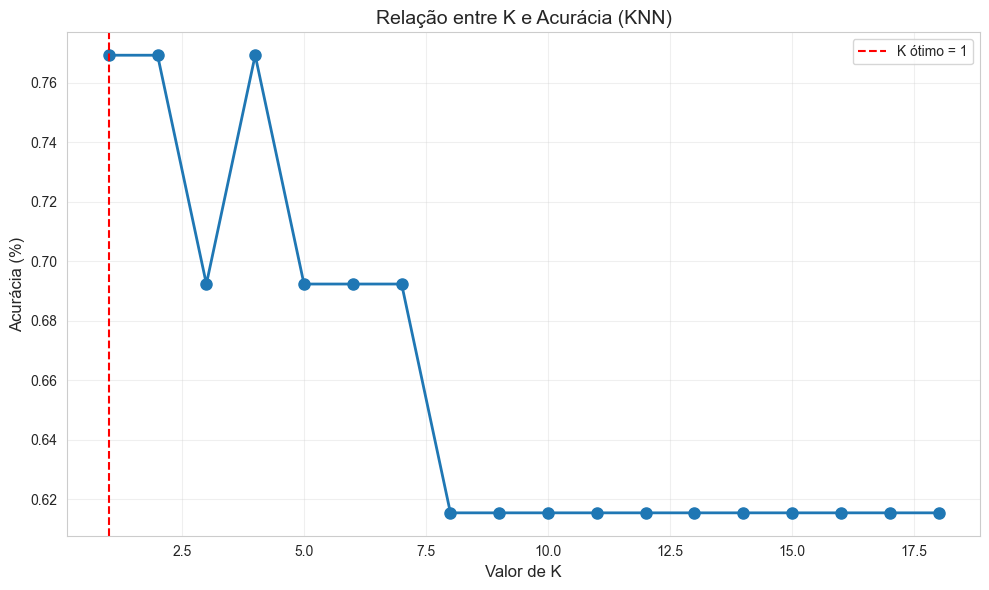

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linewidth=2, markersize=8)
plt.xlabel('Valor de K', fontsize=12)
plt.ylabel('Acurácia (%)', fontsize=12)
plt.title('Relação entre K e Acurácia (KNN)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axvline(x=best_k, color='r', linestyle='--', label=f'K ótimo = {best_k}')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
metrics = ['euclidean', 'manhattan', 'chebyshev']

for metric in metrics:
    knn = KNNClassifier(k=7, distance_metric=metric)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    print(f"{metric:12s}: {acc:.4f}")

euclidean   : 0.6923
manhattan   : 0.6923
chebyshev   : 0.6154


### Teste Leukemia ALL-MLL

In [ ]:
X, y = loader.load_dataset('leukemia')
X_train, X_test, y_train, y_test = preprocess_dataset(
    X, y,
    normalization='minmax',
    test_size=0.3,
    random_state=42
)

knn = KNNClassifier(k=5, distance_metric='manhattan')
knn.fit(X_train, y_train)